# Dataset analysis

In [5]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
print("Are GPUs available:", tf.test.is_gpu_available())
print("Is Built With CUDA:", tf.test.is_built_with_cuda())

Num GPUs: 0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Are GPUs available: False
Is Built With CUDA: False


In [6]:
import os

os.environ['TF_GPU_DEVICE'] = 'True'

# Balanced

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Resizing, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.metrics import Precision, Recall


model_0 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

train_ds = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_0 = model_0.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_0.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 100s 623ms/step - loss: 0.5719 - accuracy: 0.8086 - val_loss: 0.1370 - val_accuracy: 0.9675
Epoch 2/30
157/157 [==============================] - 97s 615ms/step - loss: 0.0923 - accuracy: 0.9750 - val_loss: 0.6224 - val_accuracy: 0.7475
Epoch 3/30
157/157 [==============================] - 95s 602ms/step - loss: 0.0692 - accuracy: 0.9800 - val_loss: 1.4503 - val_accuracy: 0.6770
Epoch 4/30
157/157 [==============================] - 96s 610ms/step - loss: 0.0579 - accuracy: 0.9808 - val_loss: 0.1363 - val_accuracy: 0.9455
Epoch 5/30
157/157 [==============================] - 90s 570ms/step - loss: 0.0630 - accuracy: 0.9780 - val_loss: 1.1929 - val_accuracy: 0.6615
Epoch 6/30
157/157 [==============================] - 86s 549ms/step - loss: 0.0540 - accuracy: 0.9798 - val_loss: 0.1850 - val_accuracy: 0.9340
Epoch 

# Unbalanced

In [9]:
model_1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    
    Dropout(.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

"""This defines a sequential CNN model with four convolutional blocks, each consisting of a convolutional layer, batch normalization, ReLU activation, and max pooling. After the convolutional base, there's a dropout layer for regularization, a flatten layer to convert the 3D feature maps to 1D feature vectors, followed by two dense layers ending in a softmax for classification into 5 classes."""

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

imbalance_ratios = [0.9, 0.7, 0.3, 0.3, 0.3]
imb_dataset = []

for batch, labels in train_ds_bal:
    for image, label in zip(batch, labels):
        label_index = np.argmax(label.numpy())
        if np.random.rand() < imbalance_ratios[label_index]:
            imb_dataset.append((image, label))
            
imb_images, imb_labels = zip(*imb_dataset)  # This separates the images and labels
imb_images = tf.stack(imb_images)
imb_labels = tf.stack(imb_labels)

train_ds_imb = tf.data.Dataset.from_tensor_slices((imb_images, imb_labels)).batch(32)

"""This part of the code is used to create an artificially imbalanced dataset. It loads a balanced dataset from the directory and then uses predefined imbalance ratios to selectively keep certain images in the dataset, based on the random number generated compared to the imbalance ratio for each class. This will make some classes have more samples than others, simulating an imbalanced dataset."""

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

"""This code loads validation and testing datasets from the specified directories. They're set to be shuffled with a batch size of 32 and image size of 128x128. Labels are in "categorical" format which means one-hot encoded vectors."""

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(
    train_ds_imb,
    validation_data=val_data,
    epochs=30
)

"""The model is compiled with categorical crossentropy as the loss function, using the Adam optimizer. It's trained on the imbalanced training dataset for 30 epochs, with validation data provided for evaluation after each epoch."""

loss, accuracy = model_1.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

"""Finally, the model is evaluated on the test dataset, and the loss and accuracy are printed. Accuracy is scaled to a percentage for easier interpretation."""

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
80/80 [==============================] - 51s 613ms/step - loss: 0.8488 - accuracy: 0.6974 - val_loss: 0.7428 - val_accuracy: 0.6120
Epoch 2/30
80/80 [==============================] - 49s 617ms/step - loss: 0.2404 - accuracy: 0.9255 - val_loss: 0.3760 - val_accuracy: 0.9155
Epoch 3/30
80/80 [==============================] - 50s 626ms/step - loss: 0.0815 - accuracy: 0.9815 - val_loss: 1.6845 - val_accuracy: 0.6070
Epoch 4/30
80/80 [==============================] - 51s 636ms/step - loss: 0.0685 - accuracy: 0.9775 - val_loss: 0.3124 - val_accuracy: 0.8780
Epoch 5/30
80/80 [==============================] - 49s 610ms/step - loss: 0.0478 - accuracy: 0.9866 - val_loss: 0.0666 - val_accuracy: 0.9830
Epoch 6/30
80/80 [==============================] - 48s 597ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.3879 - val_accuracy: 0.8985
Epoch 7/30
80/80 [=

# Model 1: Adadelta & selu

In [10]:
model_2 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('selu'),
    
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('selu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3),),
    BatchNormalization(),
    Activation('selu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3),),
    BatchNormalization(),
    Activation('selu'),
    
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='selu'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_2.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

history_2 = model_2.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_2.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 103s 641ms/step - loss: 2.3309 - accuracy: 0.2656 - val_loss: 1.7074 - val_accuracy: 0.3460
Epoch 2/30
157/157 [==============================] - 102s 647ms/step - loss: 1.7183 - accuracy: 0.3626 - val_loss: 1.2391 - val_accuracy: 0.5140
Epoch 3/30
157/157 [==============================] - 101s 643ms/step - loss: 1.3601 - accuracy: 0.4650 - val_loss: 0.9685 - val_accuracy: 0.6415
Epoch 4/30
157/157 [==============================] - 100s 638ms/step - loss: 1.1428 - accuracy: 0.5420 - val_loss: 0.8050 - val_accuracy: 0.7150
Epoch 5/30
157/157 [==============================] - 101s 644ms/step - loss: 0.9606 - accuracy: 0.6222 - val_loss: 0.6976 - val_accuracy: 0.7620
Epoch 6/30
157/157 [==============================] - 98s 625ms/step - loss: 0.8666 - accuracy: 0.6664 - val_loss: 0.6148 - val_accuracy: 0.8050
Ep

# Model 2: Nadam & sigmoid

In [11]:
model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='sigmoid'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_3.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history_3 = model_3.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_3.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 103s 631ms/step - loss: 0.7926 - accuracy: 0.7708 - val_loss: 2.2216 - val_accuracy: 0.2000
Epoch 2/30
157/157 [==============================] - 99s 627ms/step - loss: 0.2281 - accuracy: 0.9704 - val_loss: 2.0396 - val_accuracy: 0.2315
Epoch 3/30
157/157 [==============================] - 99s 630ms/step - loss: 0.1367 - accuracy: 0.9786 - val_loss: 1.6057 - val_accuracy: 0.4420
Epoch 4/30
157/157 [==============================] - 100s 638ms/step - loss: 0.0964 - accuracy: 0.9840 - val_loss: 1.5768 - val_accuracy: 0.5470
Epoch 5/30
157/157 [==============================] - 104s 660ms/step - loss: 0.0586 - accuracy: 0.9906 - val_loss: 1.1081 - val_accuracy: 0.6225
Epoch 6/30
157/157 [==============================] - 94s 596ms/step - loss: 0.0490 - accuracy: 0.9918 - val_loss: 0.8362 - val_accuracy: 0.7520
Epoc

# Adamax & ELU

In [12]:
model_4 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('elu'),
    
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='elu'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_4.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history_4 = model_4.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_4.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 106s 651ms/step - loss: 0.3175 - accuracy: 0.8962 - val_loss: 0.5485 - val_accuracy: 0.7785
Epoch 2/30
157/157 [==============================] - 97s 615ms/step - loss: 0.0655 - accuracy: 0.9770 - val_loss: 0.6644 - val_accuracy: 0.7905
Epoch 3/30
157/157 [==============================] - 101s 645ms/step - loss: 0.0545 - accuracy: 0.9796 - val_loss: 0.0472 - val_accuracy: 0.9825
Epoch 4/30
157/157 [==============================] - 103s 656ms/step - loss: 0.0447 - accuracy: 0.9832 - val_loss: 0.1833 - val_accuracy: 0.9400
Epoch 5/30
157/157 [==============================] - 103s 657ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.1060 - val_accuracy: 0.9605
Epoch 6/30
157/157 [==============================] - 101s 643ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 2.7456 - val_accuracy: 0.5365
Ep

In [20]:
import pickle

histories = []
histories.append(history_0)
histories.append(history_1)
histories.append(history_2)
histories.append(history_3)
histories.append(history_4)

history_names = ['Balanced', 'Unbalanced', 'AdaDelta & SELU', 'Nadam & Sigmoid', 'Adamax & ELU']

# Convert histories to a dictionary format for easier saving and retrieval
histories_dict = {name: history.history for history, name in zip(histories, history_names)}

# Save histories to a file
with open('training_histories.pkl', 'wb') as file:
    pickle.dump(histories_dict, file)

print("Histories saved successfully!")

Histories saved successfully!


# Load Models that already exist:

In [23]:
import tensorflow as tf
import os

# Directory where models are saved
models_directory = 'trained_models'

# Get list of model directories or files in the 'trained_models' folder
model_paths = [os.path.join(models_directory, model_name) for model_name in os.listdir(models_directory)]

# Initialize an empty list to store the loaded models
loaded_models = []

# Load each model
for model_path in model_paths:
    # Check if the model is in SavedModel format by looking for the 'saved_model.pb' file
    if os.path.isdir(model_path) and 'saved_model.pb' in os.listdir(model_path):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)
    # Check if the model is in HDF5 format by looking for the '.h5' extension
    elif model_path.endswith('.h5'):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)

print(f"Loaded {len(loaded_models)} models from '{models_directory}' directory.")

Loaded 5 models from 'trained_models' directory.


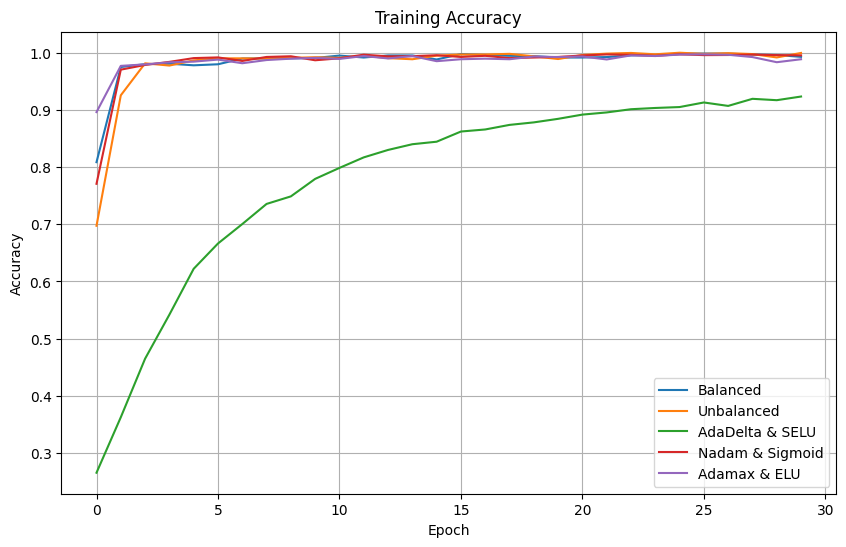

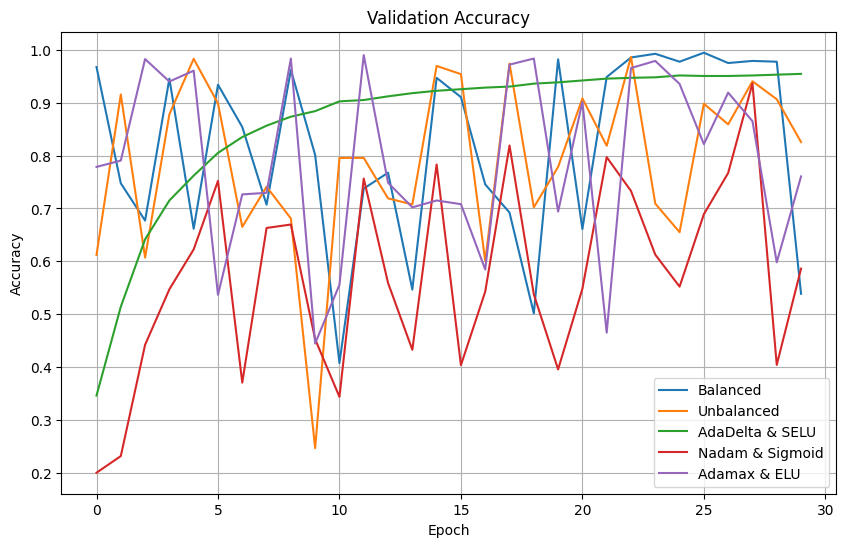

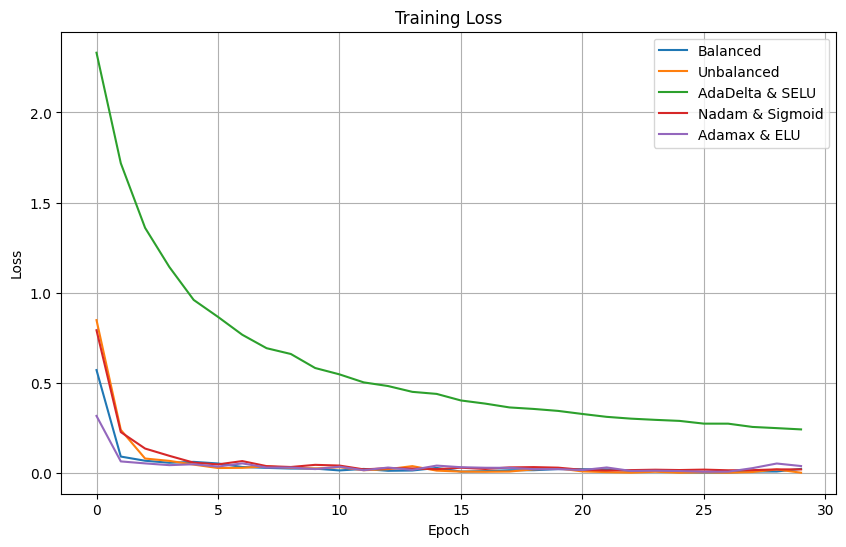

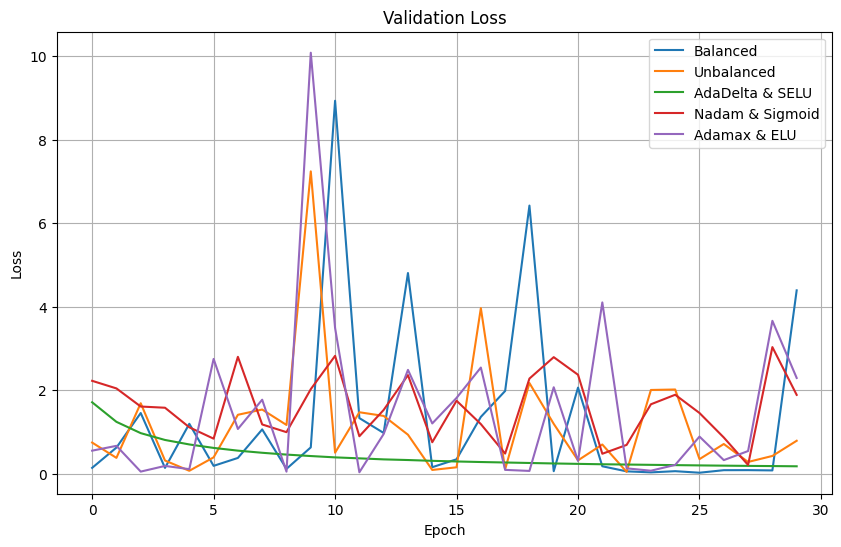

In [21]:
import matplotlib.pyplot as plt

# Plotting Training Accuracy
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['accuracy'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Validation Accuracy
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Training Loss
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['loss'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plotting Validation Loss
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.show()

# Save Models

In [22]:
models = []
models.append(model_0)
models.append(model_1)
models.append(model_2)
models.append(model_3)
models.append(model_4)

model_dir = 'trained_models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

for idx, model in enumerate(models):
    model.save(f'trained_models/model_{idx}')

INFO:tensorflow:Assets written to: trained_models/model_0\assets


INFO:tensorflow:Assets written to: trained_models/model_0\assets


INFO:tensorflow:Assets written to: trained_models/model_1\assets


INFO:tensorflow:Assets written to: trained_models/model_1\assets


INFO:tensorflow:Assets written to: trained_models/model_2\assets


INFO:tensorflow:Assets written to: trained_models/model_2\assets


INFO:tensorflow:Assets written to: trained_models/model_3\assets


INFO:tensorflow:Assets written to: trained_models/model_3\assets


INFO:tensorflow:Assets written to: trained_models/model_4\assets


INFO:tensorflow:Assets written to: trained_models/model_4\assets


# Load Models

In [ ]:
# import tensorflow as tf
# import os

# # Directory where models are saved
# models_directory = 'trained_models'

# # Get list of model directories or files in the 'trained_models' folder
# model_paths = [os.path.join(models_directory, model_name) for model_name in os.listdir(models_directory)]

# # Initialize an empty list to store the loaded models
# loaded_models = []

# # Load each model
# for model_path in model_paths:
#     # Check if the model is in SavedModel format by looking for the 'saved_model.pb' file
#     if os.path.isdir(model_path) and 'saved_model.pb' in os.listdir(model_path):
#         model = tf.keras.models.load_model(model_path)
#         loaded_models.append(model)
#     # Check if the model is in HDF5 format by looking for the '.h5' extension
#     elif model_path.endswith('.h5'):
#         model = tf.keras.models.load_model(model_path)
#         loaded_models.append(model)

# print(f"Loaded {len(loaded_models)} models from '{models_directory}' directory.")


# Display Intermediate Activations

1/1 [==============================] - 0s 129ms/step


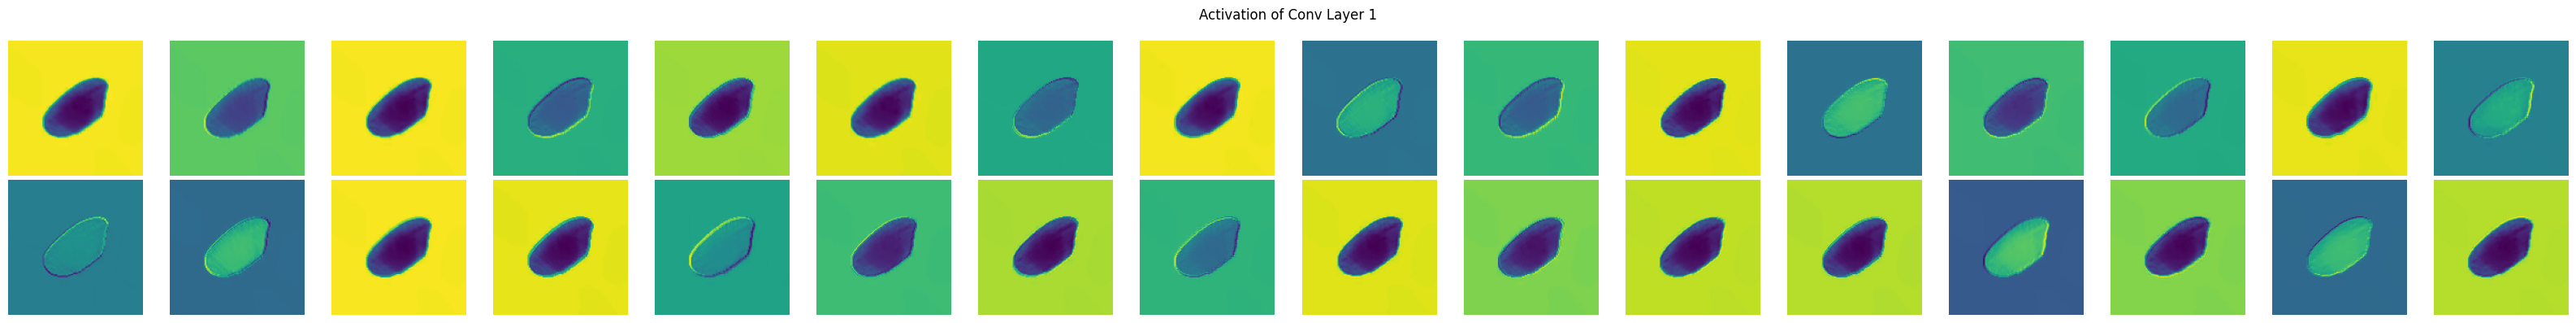

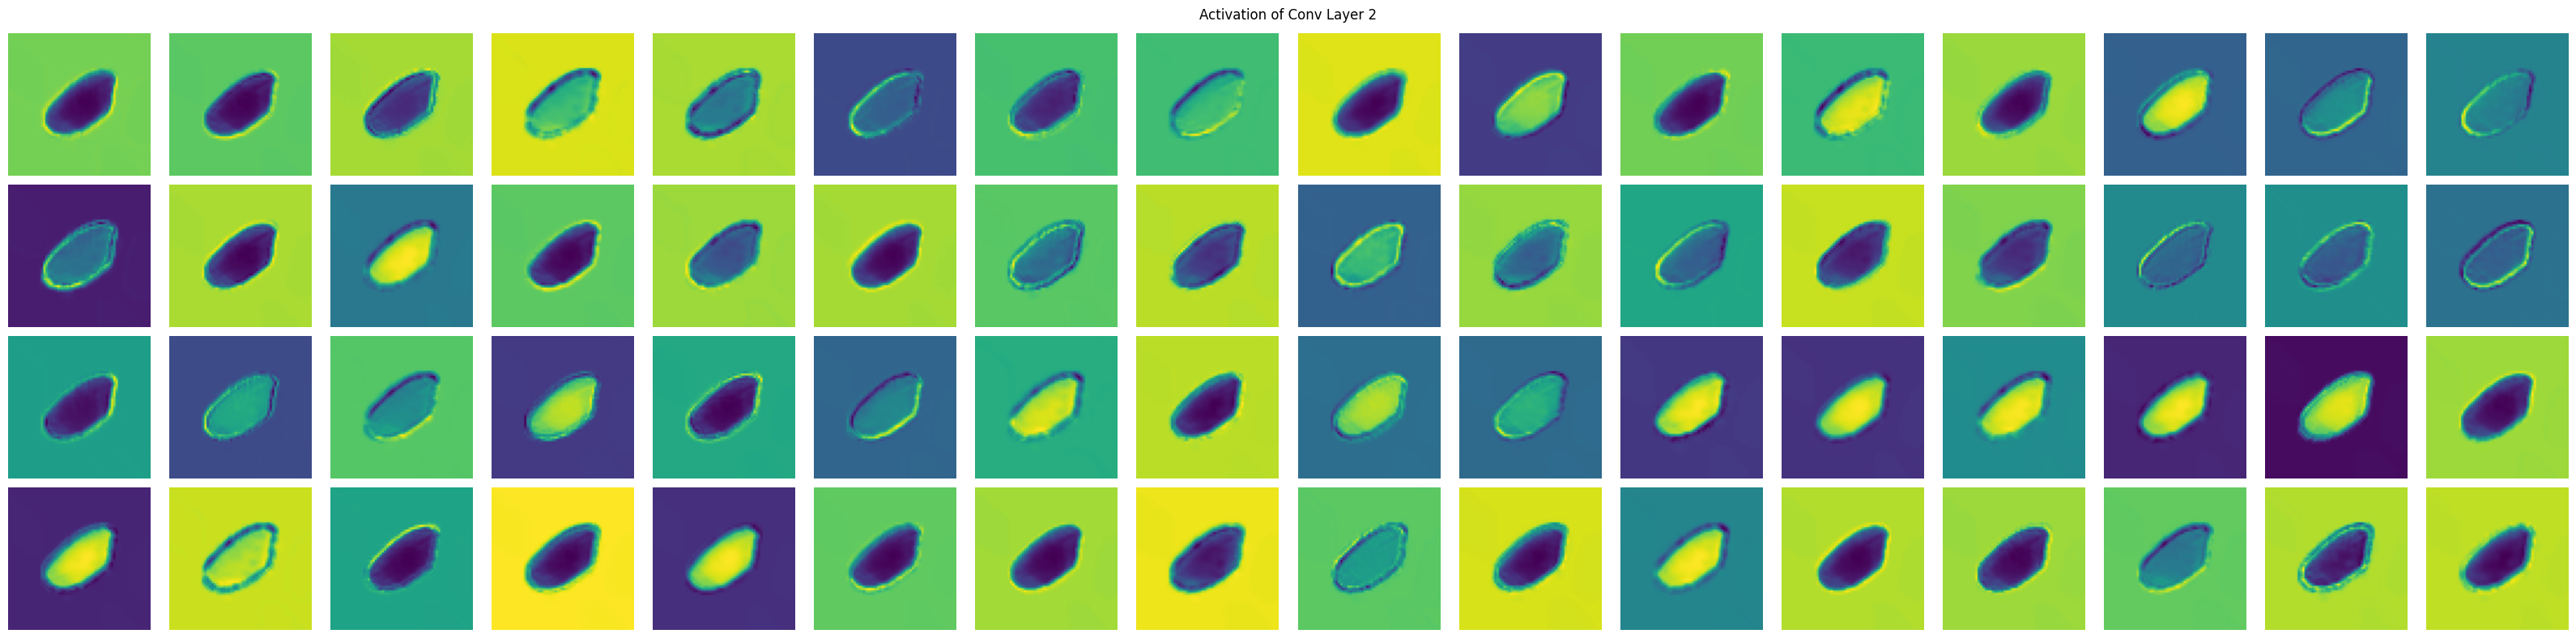

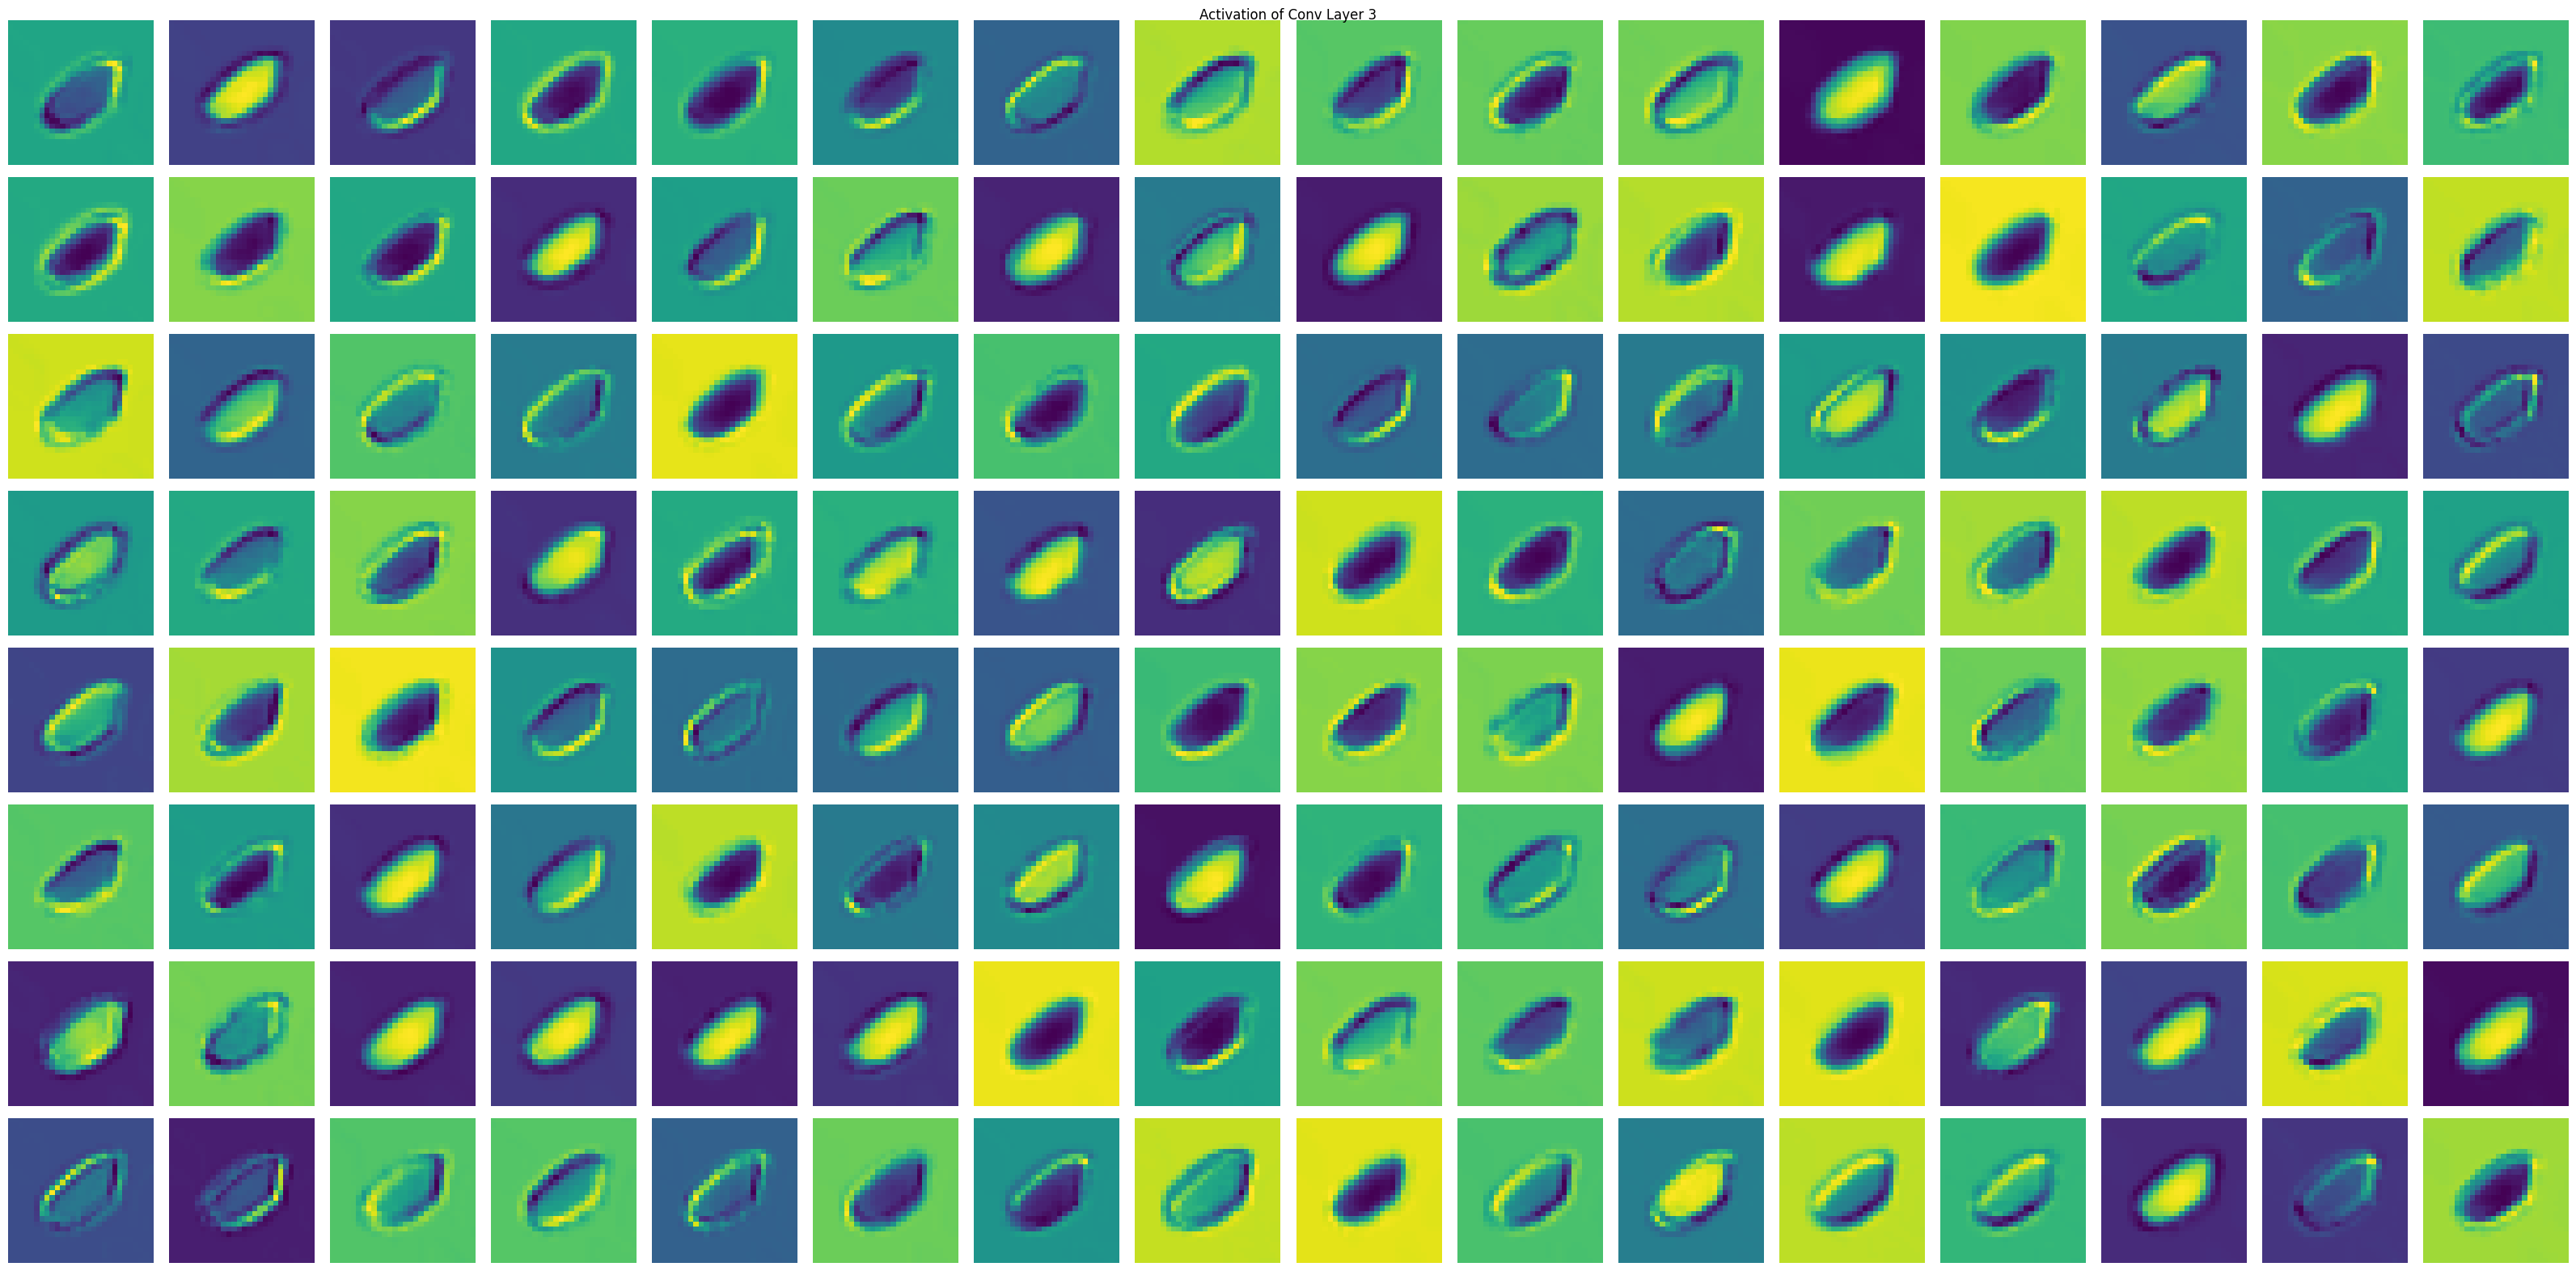

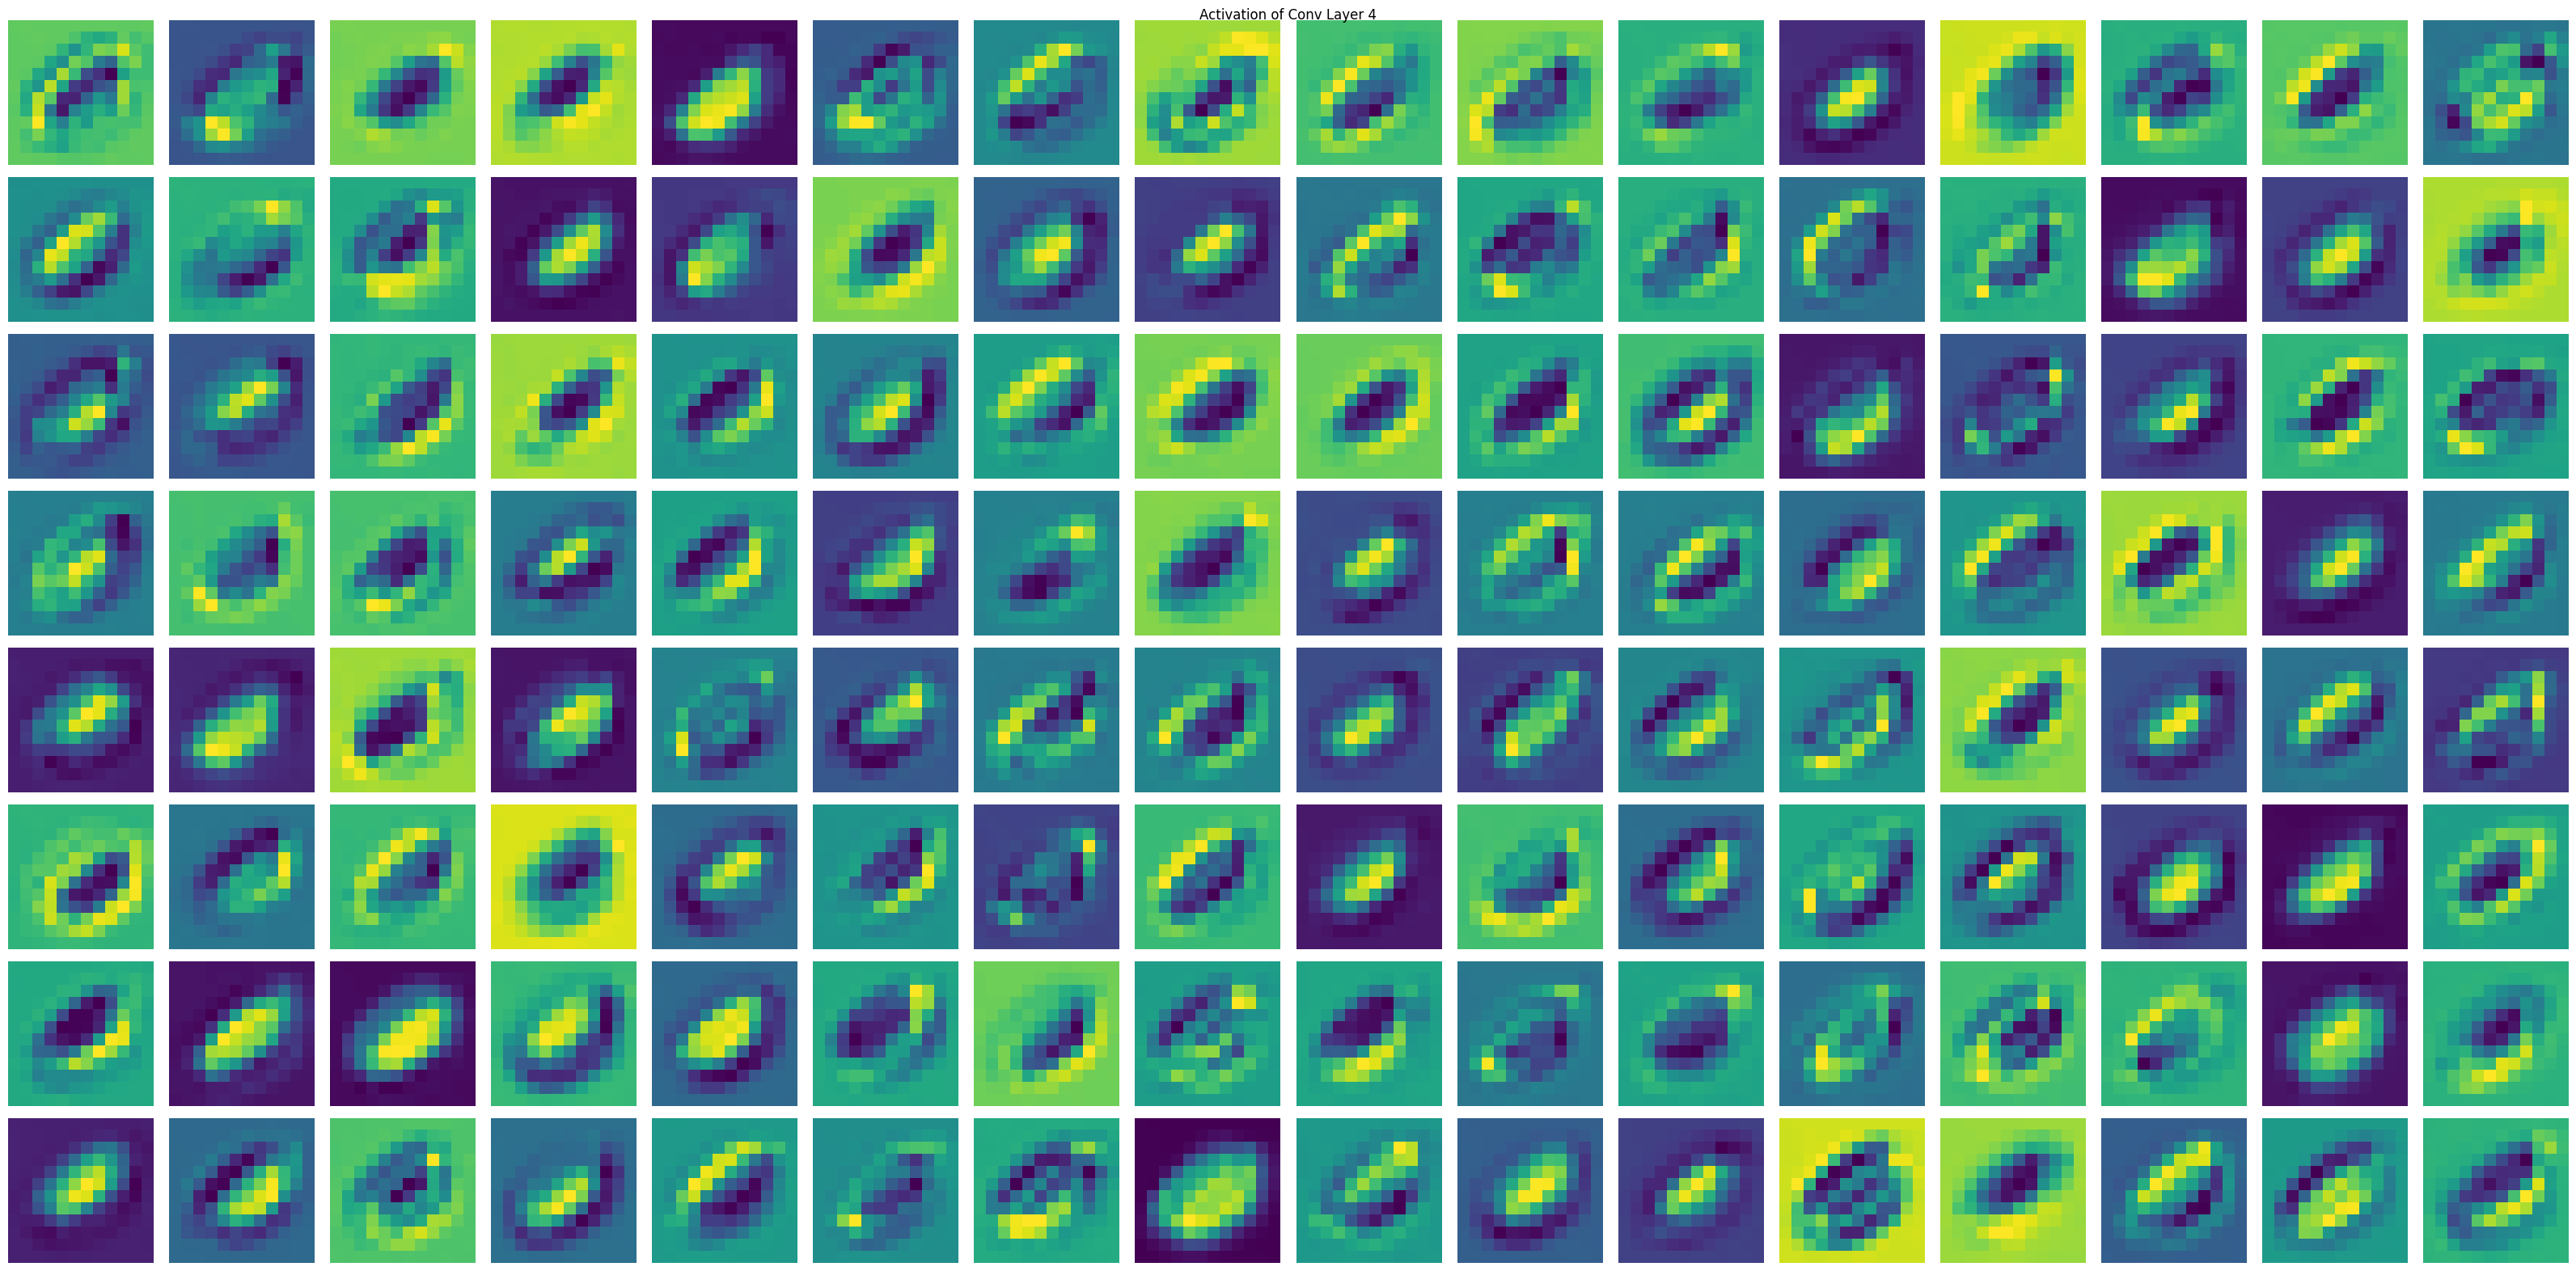

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os

# Get the current working directory using IPython magic command
current_directory = %pwd

# Create the path relative to the current directory
image_path = os.path.join(current_directory, 'data_sorted', 'testing', 'Arborio', 'Arborio (65).jpg')

# Load the image using the created path


image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

# Expand dimensions for batch size
image_tensor = tf.expand_dims(image_tensor, axis=0)

# If needed, normalize the image tensor values to [0, 1]
image_tensor = image_tensor / 255.0


# Assuming img_tensor is your input image tensor
# Reshape the image tensor to the appropriate shape if necessary, for example: img_tensor = img_tensor.reshape(1, 128, 128, 3)

layer_outputs = [layer.output for layer in model_4.layers if 'conv' in layer.name]  # Only get conv layers
activation_model = Model(inputs=model_4.input, outputs=layer_outputs)
activations = activation_model.predict(image_tensor)

# Display the activations from the convolutional layers
for i, activation in enumerate(activations):
    num_filters = activation.shape[-1]
    size = activation.shape[1]  # assuming square filters
    n_cols = min(num_filters, 16)  # Set the number of columns to 8 or less
    n_rows = num_filters // n_cols + (num_filters % n_cols > 0)  # Calculate the number of rows needed

    plt.figure(figsize=(n_cols * 2, n_rows * 2))  # Adjust the figure size appropriately

    for j in range(num_filters):
        ax = plt.subplot(n_rows, n_cols, j + 1)
        ax.imshow(activation[0, :, :, j], cmap='viridis')
        plt.axis('off')
    
    plt.suptitle(f"Activation of Conv Layer {i + 1}")
    plt.tight_layout()  # Adjust subplots to fit in the figure area.
    plt.show()


# Visualize Convolutional Filters

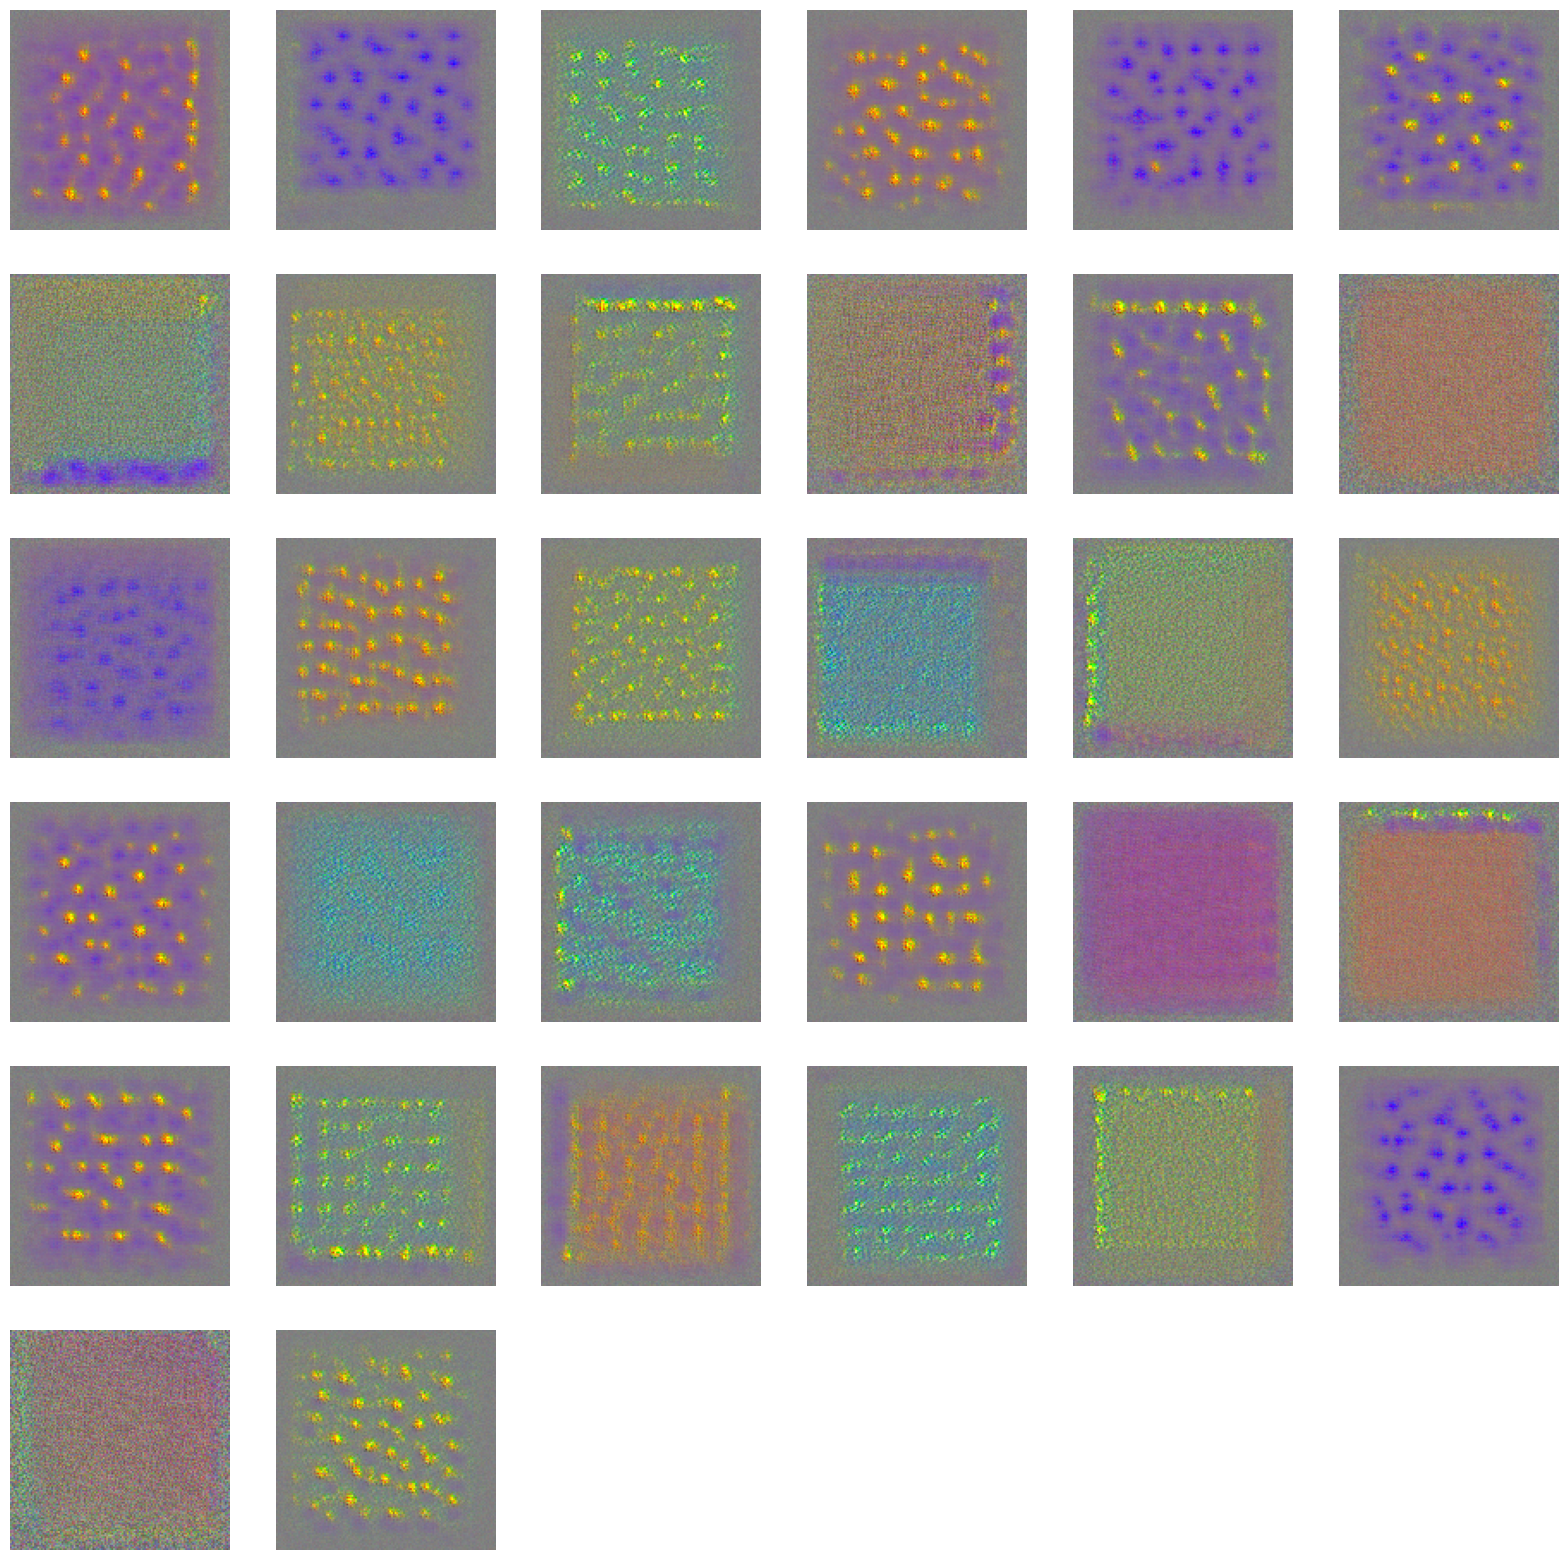

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def get_activations(model, layer_name, input_image):
    """Helper function to get activations of a specific layer for a given input image."""
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                     outputs=model.get_layer(layer_name).output)
    intermediate_layer_model.trainable = False
    return intermediate_layer_model(input_image)

def generate_pattern(layer_name, filter_index, size=128):
    input_img_data = tf.Variable(np.random.random((1, size, size, 3)) * 20 + 128., dtype=tf.float32)
    step = 1.
    
    for _ in range(40):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            activations = get_activations(model_4, layer_name, input_img_data)
            loss_value = tf.keras.backend.mean(activations[:, :, :, filter_index])
            
        grads_value = tape.gradient(loss_value, input_img_data)
        
        norm_grads = tf.sqrt(tf.reduce_mean(tf.square(grads_value))) + 1e-5
        grads_value /= norm_grads
        input_img_data.assign_add(grads_value * step)
        
    img = input_img_data.numpy()[0]
    return deprocess_image(img)

# Visualize some filters for the first convolutional layer
plt.figure(figsize=(20, 20))
for i in range(32):  # 32 filters in the first convolutional layer
    filter_img = generate_pattern('conv2d_23', i)
    plt.subplot(6, 6, i+1)
    plt.imshow(filter_img)
    plt.axis('off')
plt.show()
